In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Input, Dense

Using TensorFlow backend.


#### Carregar base de dados

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

#### Normalizar os dados

In [4]:
previsores_treinamento = x_train.astype('float32')
previsores_teste = x_test.astype('float32')

previsores_treinamento /= 255
previsores_teste /= 255

In [5]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

In [6]:
previsores_treinamento.shape

(50000, 3072)

### Estrutura do Autoencoder
- total de dados = 32x32x3 = 3072
- 3072 - 1536 - 768 - 1536 - 3072 


In [11]:
autoencoder = Sequential()
# Encoder
autoencoder.add(Dense(units=1536, activation='relu', input_dim = 3072))
autoencoder.add(Dense(units=768, activation='relu'))

#Decode
autoencoder.add(Dense(units=1536, activation='relu'))
autoencoder.add(Dense(units=3072, activation='sigmoid'))

In [12]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1536)              4720128   
_________________________________________________________________
dense_6 (Dense)              (None, 768)               1180416   
_________________________________________________________________
dense_7 (Dense)              (None, 1536)              1181184   
_________________________________________________________________
dense_8 (Dense)              (None, 3072)              4721664   
Total params: 11,803,392
Trainable params: 11,803,392
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 100, batch_size = 256,
                validation_data = (previsores_teste, previsores_teste), use_multiprocessing=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 178s 4ms/step - loss: 0.6322 - accuracy: 0.0113 - val_loss: 0.6099 - val_accuracy: 0.0120
Epoch 2/100
50000/50000 [==============================] - 327s 7ms/step - loss: 0.5970 - accuracy: 0.0120 - val_loss: 0.5893 - val_accuracy: 0.0121
Epoch 3/100
50000/50000 [==============================] - 690s 14ms/step - loss: 0.5861 - accuracy: 0.0120 - val_loss: 0.5842 - val_accuracy: 0.0121
Epoch 4/100
50000/50000 [==============================] - 291s 6ms/step - loss: 0.5818 - accuracy: 0.0120 - val_loss: 0.5808 - val_accuracy: 0.0121
Epoch 5/100
50000/50000 [==============================] - 268s 5ms/step - loss: 0.5791 - accuracy: 0.0120 - val_loss: 0.5792 - val_accuracy: 0.0121
Epoch 6/100
50000/50000 [==============================] - 264s 5ms/step - loss: 0.5770 - accuracy: 0.0121 - val_loss: 0.5764 - val_accuracy: 0.0121
Epoch 7/100
50000/50000 [==============================

50000/50000 [==============================] - 319s 6ms/step - loss: 0.5622 - accuracy: 0.0121 - val_loss: 0.5632 - val_accuracy: 0.0121
Epoch 56/100
50000/50000 [==============================] - 324s 6ms/step - loss: 0.5619 - accuracy: 0.0121 - val_loss: 0.5644 - val_accuracy: 0.0121
Epoch 57/100
50000/50000 [==============================] - 318s 6ms/step - loss: 0.5618 - accuracy: 0.0121 - val_loss: 0.5641 - val_accuracy: 0.0121
Epoch 58/100
50000/50000 [==============================] - 326s 7ms/step - loss: 0.5620 - accuracy: 0.0121 - val_loss: 0.5636 - val_accuracy: 0.0121
Epoch 59/100
50000/50000 [==============================] - 318s 6ms/step - loss: 0.5618 - accuracy: 0.0121 - val_loss: 0.5639 - val_accuracy: 0.0121
Epoch 60/100
50000/50000 [==============================] - 318s 6ms/step - loss: 0.5618 - accuracy: 0.0121 - val_loss: 0.5642 - val_accuracy: 0.0121
Epoch 61/100
50000/50000 [==============================] - 318s 6ms/step - loss: 0.5615 - accuracy: 0.0121 - val

#### Encoder

In [14]:
dimensao_original = Input(shape=(3072,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
encoder = Model(dimensao_original, camada_encoder2(camada_encoder1(dimensao_original)))
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1536)              4720128   
_________________________________________________________________
dense_6 (Dense)              (None, 768)               1180416   
Total params: 5,900,544
Trainable params: 5,900,544
Non-trainable params: 0
_________________________________________________________________


In [15]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

#### Comparação entre as imagens originais, codificadas e decodificadas

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

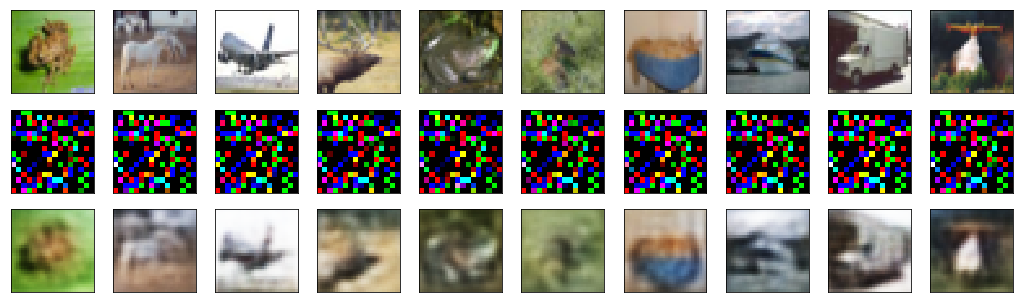

In [16]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):
    #print(i)
    #print(indice_imagem)
    
    # imagem original
    eixo = plt.subplot(10,10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())
    
    # imagem codificada
    eixo = plt.subplot(10,10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16,16,3))
    plt.xticks(())
    plt.yticks(())
    
     # imagem reconstruída
    eixo = plt.subplot(10,10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())
plt.show()